## 데이터 불러오기

In [1]:
import pandas as pd

train = pd.read_csv('../../../물류 유통량/train.csv',index_col='index')
test = pd.read_csv('../../../물류 유통량/test.csv',index_col='index')

submission = pd.read_csv('../../../물류 유통량/sample_submission.csv')

In [2]:
train.head(20)

,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
index,,,,
0,5011000595017300,2871000192069300,음반,3
1,4148000690043300,5011000264024400,문화컨텐츠,3
2,5011000078068400,1120000007005400,농산물,3
3,4127100048006400,5011000587019400,기타식품,7
4,5011000078068400,2823700010076300,농산물,3
5,5013000778073200,4159000114016400,농산물,6
6,5011000316024300,4827000369060200,수산,5
7,5013000740006400,4111700017039400,농산물,3
8,4136000209094100,5013000823053400,아우터,3


In [3]:
test.head(20)

,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리
index,,,
0,4167000577042200,5011000435014100,선케어
1,1156000009012200,5011000172034400,구강위생용품
2,4122000363057300,5011000361097300,캠핑
3,5011000436041400,2826000084036400,아웃도어가구
4,4150000241065200,5011000169044300,분유/이유식/아기간식
5,5011000627031200,4713000116016300,커튼/블라인드
6,2826000127090100,5013000471090400,침구단품
7,1129000014045300,5011000435022200,가방
8,1121500007053400,5011000374043300,침구단품


- 송하인, 수하인 격자공간고유번호가 특정 자리수 숫자가 반복이된다
- 확인이 필요할듯

In [4]:
train['송하인_격자공간고유번호'] = train['송하인_격자공간고유번호'].astype('str')
train['수하인_격자공간고유번호'] = train['수하인_격자공간고유번호'].astype('str')
test['송하인_격자공간고유번호'] = test['송하인_격자공간고유번호'].astype('str')
test['수하인_격자공간고유번호'] = test['수하인_격자공간고유번호'].astype('str')


send = list(train['송하인_격자공간고유번호'].unique())
reci = list(train['수하인_격자공간고유번호'].unique())

In [5]:
# 송하인 격자번호에서 414으로 시작하는 번호를 샘플로 확인
# 총 번호가 16자리 이니까 4개씩 끊어지지 않을까?
# 최종 군집수가 가장 적어지는 방향으로 16자리를 끊어보자

temp = []

for i in send:
    if i.startswith('414'):
        temp.append(i)
        
temp = list(set(temp))
temp

['4148000664093200',
 '4145000014041300',
 '4148000672094100',
 '4148000664068400',
 '4148000489065400',
 '4148000539023100',
 '4146300037044400',
 '4146100238100100',
 '4145000082015200',
 '4146100061045100',
 '4146100155034200',
 '4145000051002100',
 '4148000560069200',
 '4148000697009200',
 '4143000031012100',
 '4146300010011100',
 '4146100274005300',
 '4145000078028100',
 '4148000680050200',
 '4146500019037200',
 '4145000036090300',
 '4146100285026100',
 '4148000513064400',
 '4148000532084200',
 '4146100353012300',
 '4146300064039300',
 '4146100014028200',
 '4146300050007100',
 '4148000687060400',
 '4148000500091400',
 '4143000032065100',
 '4145000025010100',
 '4146300017003400',
 '4146300046081400',
 '4141000003018200',
 '4148000427007400',
 '4146100129049200',
 '4148000699057100',
 '4145000025069400',
 '4146100114080400',
 '4145000048032100',
 '4148000625080300',
 '4146300041086200',
 '4143000031089200',
 '4148000688087300',
 '4146100445047100',
 '4145000013082100',
 '41461004061

In [6]:
"""# 16자리 번호를 4 구역으로 나누는 모든 경우

from itertools import permutations

ans = []
nums = [i for i in range(1,17)]
perm = list(permutations(nums, 4))

for i in range(1,8):
    perm = list(permutations(nums, i))
    for j in perm:
        if sum(j) == 16:
            ans.append(j)

ans"""

'# 16자리 번호를 4 구역으로 나누는 모든 경우\n\nfrom itertools import permutations\n\nans = []\nnums = [i for i in range(1,17)]\nperm = list(permutations(nums, 4))\n\nfor i in range(1,8):\n    perm = list(permutations(nums, i))\n    for j in perm:\n        if sum(j) == 16:\n            ans.append(j)\n\nans'

In [7]:
"""min_cat = 10000000000000000000
temp = send
for comb in ans:
    count = 0
    tot_cat = 1
    for num in comb:
        temp_n = [i[count:num] for i in temp]
        count += num
        tot_cat *= len(list(set(temp_n)))
        print(tot_cat)
    
#     cat_1 = list(set(temp_1))
#     cat_2 = list(set(temp_2))
#     cat_3 = list(set(temp_3))
#     cat_4 = list(set(temp_4))
#     tot_cat = len(cat_1) * len(cat_2) * len(cat_3) * len(cat_4)

    if min_cat > tot_cat:
        print('===================================')
#         print('< 현재 최적 분할 >')
#         print('각 자리수: ',comb)
#         print('최종 카테고리 수: ', tot_cat)
    min_cat = min(min_cat, tot_cat)
# print(min_cat)"""

"min_cat = 10000000000000000000\ntemp = send\nfor comb in ans:\n    count = 0\n    tot_cat = 1\n    for num in comb:\n        temp_n = [i[count:num] for i in temp]\n        count += num\n        tot_cat *= len(list(set(temp_n)))\n        print(tot_cat)\n    \n#     cat_1 = list(set(temp_1))\n#     cat_2 = list(set(temp_2))\n#     cat_3 = list(set(temp_3))\n#     cat_4 = list(set(temp_4))\n#     tot_cat = len(cat_1) * len(cat_2) * len(cat_3) * len(cat_4)\n\n    if min_cat > tot_cat:\n        print('===================================')\n#         print('< 현재 최적 분할 >')\n#         print('각 자리수: ',comb)\n#         print('최종 카테고리 수: ', tot_cat)\n    min_cat = min(min_cat, tot_cat)\n# print(min_cat)"

- 확인 결과 총 6자리 중 앞 3자리는 고정 번호인 것 같음
- 이후 번호는 어디까지 끊어지는지 확인해보자

In [8]:
# 1~3자리 숫자인 고유번호 414을 제외한 나머지 번호들 확인
temp = [i[3:] for i in temp]
temp

['8000664093200',
 '5000014041300',
 '8000672094100',
 '8000664068400',
 '8000489065400',
 '8000539023100',
 '6300037044400',
 '6100238100100',
 '5000082015200',
 '6100061045100',
 '6100155034200',
 '5000051002100',
 '8000560069200',
 '8000697009200',
 '3000031012100',
 '6300010011100',
 '6100274005300',
 '5000078028100',
 '8000680050200',
 '6500019037200',
 '5000036090300',
 '6100285026100',
 '8000513064400',
 '8000532084200',
 '6100353012300',
 '6300064039300',
 '6100014028200',
 '6300050007100',
 '8000687060400',
 '8000500091400',
 '3000032065100',
 '5000025010100',
 '6300017003400',
 '6300046081400',
 '1000003018200',
 '8000427007400',
 '6100129049200',
 '8000699057100',
 '5000025069400',
 '6100114080400',
 '5000048032100',
 '8000625080300',
 '6300041086200',
 '3000031089200',
 '8000688087300',
 '6100445047100',
 '5000013082100',
 '6100406100100',
 '8000493033300',
 '6100328083400',
 '5000021082400',
 '5000007038400',
 '1000031030100',
 '5000060088200',
 '6100164039300',
 '80004560

In [9]:
# 4~6 자리 숫자가 규칙성을 보임 이를 확인해봄
print(sorted(list(set([i[:3] for i in temp]))))

# 4~7 자리 숫자가 규칙성을 보임 이를 확인해봄
print(sorted(list(set([i[:4] for i in temp]))))

['100', '300', '500', '610', '630', '650', '800']
['1000', '3000', '5000', '6100', '6300', '6500', '8000']


- 위 두 결과가 동일하게 출력된 것으로 보아 4~7자리가 규칙성을 가진다고 보는게 맞다
- 이후 번호는 어디서 끊어지는지 확인

In [10]:
temp = [i[4:] for i in temp]
temp

['664093200',
 '014041300',
 '672094100',
 '664068400',
 '489065400',
 '539023100',
 '037044400',
 '238100100',
 '082015200',
 '061045100',
 '155034200',
 '051002100',
 '560069200',
 '697009200',
 '031012100',
 '010011100',
 '274005300',
 '078028100',
 '680050200',
 '019037200',
 '036090300',
 '285026100',
 '513064400',
 '532084200',
 '353012300',
 '064039300',
 '014028200',
 '050007100',
 '687060400',
 '500091400',
 '032065100',
 '025010100',
 '017003400',
 '046081400',
 '003018200',
 '427007400',
 '129049200',
 '699057100',
 '025069400',
 '114080400',
 '048032100',
 '625080300',
 '041086200',
 '031089200',
 '688087300',
 '445047100',
 '013082100',
 '406100100',
 '493033300',
 '328083400',
 '021082400',
 '007038400',
 '031030100',
 '060088200',
 '164039300',
 '456062300',
 '644056400',
 '690043300',
 '663037200',
 '019006200',
 '020068200',
 '667078100',
 '561057100',
 '353043100',
 '699012100',
 '626030400',
 '014031200',
 '257098200',
 '680009300',
 '007068200',
 '492077100',
 '5330

In [11]:
# 8~10 자리 숫자가 규칙성을 보임 이를 확인해봄
print(sorted(list(set([i[:3] for i in temp]))))

# 8~11 자리 숫자가 규칙성을 보임 이를 확인해봄
print(sorted(list(set([i[:4] for i in temp]))))

['001', '002', '003', '005', '007', '010', '011', '012', '013', '014', '017', '018', '019', '020', '021', '022', '025', '026', '027', '029', '030', '031', '032', '033', '034', '036', '037', '039', '041', '042', '044', '046', '048', '050', '051', '060', '061', '063', '064', '068', '070', '076', '078', '079', '080', '082', '093', '095', '114', '126', '127', '129', '146', '155', '164', '166', '234', '238', '242', '243', '257', '262', '274', '284', '285', '316', '328', '353', '355', '378', '386', '403', '406', '426', '427', '445', '451', '455', '456', '470', '477', '478', '479', '482', '484', '489', '492', '493', '498', '500', '510', '513', '514', '525', '532', '533', '534', '536', '538', '539', '557', '560', '561', '568', '588', '589', '591', '610', '616', '624', '625', '626', '644', '663', '664', '667', '672', '676', '680', '687', '688', '690', '696', '697', '699', '704']
['0010', '0020', '0030', '0050', '0070', '0100', '0110', '0120', '0130', '0140', '0170', '0180', '0190', '0200', '021

- 8 ~ 11자리로 나눈 경우보다 8 ~ 10자리로 나눴다는 것이 더욱 규칙성을 보인다
- 나머지 규칙성 찾기

In [12]:
temp = sorted([i[3:] for i in temp])
temp

['002100',
 '003300',
 '003400',
 '005200',
 '005300',
 '006200',
 '007100',
 '007100',
 '007300',
 '007400',
 '008400',
 '009100',
 '009200',
 '009200',
 '009300',
 '009400',
 '010100',
 '010200',
 '010300',
 '011100',
 '011100',
 '012100',
 '012100',
 '012300',
 '012300',
 '014300',
 '015100',
 '015200',
 '015300',
 '017100',
 '017100',
 '018100',
 '018200',
 '018300',
 '018400',
 '019100',
 '019200',
 '020400',
 '023100',
 '023300',
 '026100',
 '026400',
 '027200',
 '027200',
 '027300',
 '027400',
 '028100',
 '028200',
 '028300',
 '028400',
 '029300',
 '029400',
 '030100',
 '030100',
 '030100',
 '030400',
 '031100',
 '031100',
 '031200',
 '032100',
 '033300',
 '034200',
 '037200',
 '037200',
 '038400',
 '039100',
 '039200',
 '039200',
 '039300',
 '039300',
 '039300',
 '040300',
 '041200',
 '041300',
 '042400',
 '042400',
 '043100',
 '043300',
 '044100',
 '044300',
 '044400',
 '045100',
 '045300',
 '047100',
 '047200',
 '047300',
 '047300',
 '047300',
 '048100',
 '048400',
 '048400',

- 11 ~ 14자리와 15 ~ 16 자리가 나눠지는 것으로 보인다.

### [최종 결론]
- 1번 : 1~3 자리
- 2번 : 4~7 자리
- 3번 : 8~10 자리
- 4번 : 11~14 자리
- 5번 : 15~16 자리

즉, 000-0000-000-0000-00 와 같은 형식으로 숫자를 구분할 수 있을 것 같다

In [13]:
train['s_cat_1'] = [i[:3] for i in train['송하인_격자공간고유번호']]
train['s_cat_2'] = [i[3:7] for i in train['송하인_격자공간고유번호']]
train['s_cat_3'] = [i[7:10] for i in train['송하인_격자공간고유번호']]
train['s_cat_4'] = [i[10:14] for i in train['송하인_격자공간고유번호']]
train['s_cat_5'] = [i[14:] for i in train['송하인_격자공간고유번호']]

train['r_cat_1'] = [i[:3] for i in train['수하인_격자공간고유번호']]
train['r_cat_2'] = [i[3:7] for i in train['수하인_격자공간고유번호']]
train['r_cat_3'] = [i[7:10] for i in train['수하인_격자공간고유번호']]
train['r_cat_4'] = [i[10:14] for i in train['수하인_격자공간고유번호']]
train['r_cat_5'] = [i[14:] for i in train['수하인_격자공간고유번호']]

train = train.drop(['송하인_격자공간고유번호', '수하인_격자공간고유번호'], axis=1)
train

,물품_카테고리,운송장_건수,s_cat_1,s_cat_2,s_cat_3,s_cat_4,s_cat_5,r_cat_1,r_cat_2,r_cat_3,r_cat_4,r_cat_5
index,,,,,,,,,,,,
0,음반,3,501,1000,595,0173,00,287,1000,192,0693,00
1,문화컨텐츠,3,414,8000,690,0433,00,501,1000,264,0244,00
2,농산물,3,501,1000,078,0684,00,112,0000,007,0054,00
3,기타식품,7,412,7100,048,0064,00,501,1000,587,0194,00
4,농산물,3,501,1000,078,0684,00,282,3700,010,0763,00
...,...,...,...,...,...,...,...,...,...,...,...,...
31679,스포츠잡화,3,447,1000,290,0872,00,501,1000,213,0732,00
31680,스마트디바이스,4,112,9000,014,0453,00,501,1000,319,0871,00
31681,스마트디바이스,6,112,9000,014,0453,00,501,1000,263,0652,00


In [14]:
test['s_cat_1'] = [i[:3] for i in test['송하인_격자공간고유번호']]
test['s_cat_2'] = [i[3:7] for i in test['송하인_격자공간고유번호']]
test['s_cat_3'] = [i[7:10] for i in test['송하인_격자공간고유번호']]
test['s_cat_4'] = [i[10:14] for i in test['송하인_격자공간고유번호']]
test['s_cat_5'] = [i[14:] for i in test['송하인_격자공간고유번호']]

test['r_cat_1'] = [i[:3] for i in test['수하인_격자공간고유번호']]
test['r_cat_2'] = [i[3:7] for i in test['수하인_격자공간고유번호']]
test['r_cat_3'] = [i[7:10] for i in test['수하인_격자공간고유번호']]
test['r_cat_4'] = [i[10:14] for i in test['수하인_격자공간고유번호']]
test['r_cat_5'] = [i[14:] for i in test['수하인_격자공간고유번호']]

test = test.drop(['송하인_격자공간고유번호', '수하인_격자공간고유번호'], axis=1)
test

,물품_카테고리,s_cat_1,s_cat_2,s_cat_3,s_cat_4,s_cat_5,r_cat_1,r_cat_2,r_cat_3,r_cat_4,r_cat_5
index,,,,,,,,,,,
0,선케어,416,7000,577,0422,00,501,1000,435,0141,00
1,구강위생용품,115,6000,009,0122,00,501,1000,172,0344,00
2,캠핑,412,2000,363,0573,00,501,1000,361,0973,00
3,아웃도어가구,501,1000,436,0414,00,282,6000,084,0364,00
4,분유/이유식/아기간식,415,0000,241,0652,00,501,1000,169,0443,00
...,...,...,...,...,...,...,...,...,...,...,...
7915,농산물,501,1000,266,0512,00,462,3000,417,0381,00
7916,문화컨텐츠,115,4500,001,0983,00,501,1000,264,0551,00
7917,농산물,501,3000,610,0491,00,114,7000,018,0914,00


## 데이터 전처리

In [15]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

for feature in train.columns:
    if feature != '운송장_건수':
        enc.fit(train[feature])
        print(feature, ':', enc.classes_, end=' => ')
        train[feature] = enc.transform(train[feature])
        print([i for i in range(len(enc.classes_))])

물품_카테고리 : ['DIY자재/용품' 'PC' 'PC주변기기' '가공식품' '가방' '건강식품' '건강용품' '게임기/타이틀' '계절가전' '골프'
 '공구' '과자' '구강위생용품' '기능성' '기저귀/물티슈' '기타디지털/가전' '기타스포츠/레저' '기타식품' '기타출산/육아'
 '기타패션의류' '기타패션잡화' '기타화장품/미용' '김치' '낚시' '남성화장품' '냉동/간편조리식품' '네일케어' '농산물'
 '눈관리용품' '다이어트식품' '등산' '모니터' '모자' '문구/사무용품' '문화컨텐츠' '바디케어' '반려동물' '반찬'
 '베이스메이크업' '분유/이유식/아기간식' '뷰티소품' '상의' '색조메이크업' '생활가전' '생활용품' '서재/사무용가구'
 '선글라스/안경테' '선케어' '세탁용품' '수납/정리용품' '수납가구' '수산' '스마트디바이스' '스마트디바이스액세서리'
 '스킨케어' '스포츠잡화' '신발' '아우터' '아웃도어가구' '양말/스타킹' '언더웨어' '완구/매트' '욕실용품'
 '원피스/점프슈트' '위생/건강용품' '유아가구' '음료' '음반' '음향가전' '의료용품' '이미용가전' '인테리어소품'
 '자동차용품' '잠옷' '재활운동용품' '주방가구' '주방가전' '주방용품' '주얼리' '지갑' '축산' '출산/유아동의류'
 '출산/유아동잡화' '취미용품' '침구단품' '침구세트' '침실가구' '카페트/러그' '캠핑' '커튼/블라인드' '클렌징'
 '태블릿PC/노트북액세서리' '패션소품' '하의' '향수' '헤어스타일링' '헤어액세서리' '헤어케어' '헬스' '홈데코'] => [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 

In [16]:
train

,물품_카테고리,운송장_건수,s_cat_1,s_cat_2,s_cat_3,s_cat_4,s_cat_5,r_cat_1,r_cat_2,r_cat_3,r_cat_4,r_cat_5
index,,,,,,,,,,,,
0,67,3,63,2,548,66,0,18,2,191,274,0
1,34,3,30,34,614,170,0,64,2,263,95,0
2,27,3,63,2,77,271,0,1,0,6,19,0
3,17,7,28,32,47,23,0,64,2,586,75,0
4,27,3,63,2,77,271,0,17,20,9,302,0
...,...,...,...,...,...,...,...,...,...,...,...,...
31679,55,3,42,2,283,345,0,64,2,212,289,0
31680,52,4,1,38,13,178,0,64,2,318,344,0
31681,52,6,1,38,13,178,0,64,2,262,257,0


In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

x = train.drop(['물품_카테고리'],axis=1)
y = train['물품_카테고리']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

## 모델링

In [18]:
from lightgbm import LGBMRegressor

#모델 정의
model = LGBMRegressor()
# 모델 학습
model.fit(x_train,y_train)
# train, test 데이터 예측
test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

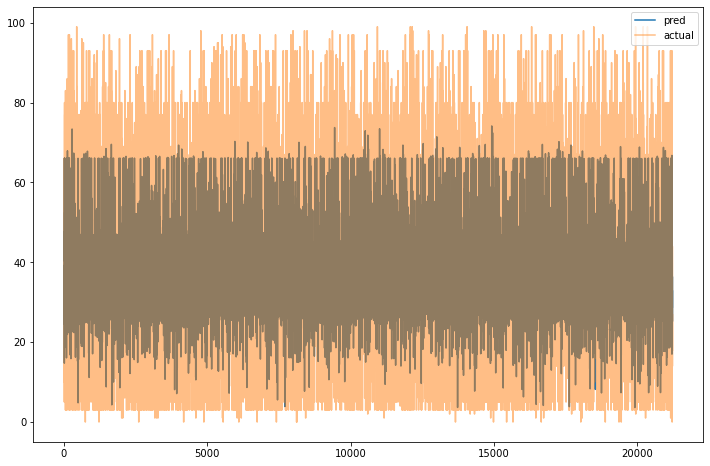

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(train_pred, label='pred')
plt.plot(y_train.values, label='actual', alpha=0.5)
plt.legend(loc='upper right')

In [20]:
from sklearn.metrics import mean_squared_error

def rmse(y, y_pred):
    return mean_squared_error(y, y_pred)**0.5

print('< train >')
print('RMSE : ', rmse(y_train, train_pred))

print('< test >')
print('RMSE : ', rmse(y_test, test_pred))

< train >
RMSE :  12.33275435400233
< test >
RMSE :  13.929469695164236


In [21]:
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostRegressor
import random

In [22]:
cat_param={'learning_rate': 0.018272261776066247, 
           'bagging_temperature': 63.512210106407046, 
           'n_estimators': 3794, 
           'max_depth': 11, 
           'random_strength': 15, 
           'colsample_bylevel': 0.49359671220172163, 
           'l2_leaf_reg': 1.7519275289243016e-06, 
           'min_child_samples': 88, 
           'max_bin': 380, 
           'od_type': 'IncToDec'
           }

In [23]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
folds = []
for train_idx, valid_idx in skf.split(x, y):
    folds.append((train_idx,valid_idx))

random.seed(42)
cat_models={}

cat_features =range(x_test.shape[1])

for fold in range(3):
    print(f'===================================={fold+1}============================================')
    train_idx, valid_idx = folds[fold]
    x_train = x.iloc[train_idx]
    x_valid = x.iloc[valid_idx]
    y_train = y[train_idx].values
    y_valid = y[valid_idx].values

    cat = CatBoostRegressor(**cat_param)
    cat.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_valid,y_valid)],
          early_stopping_rounds=35,cat_features=cat_features,
          verbose=100)
    cat_models[fold] = cat
    print(f'================================================================================\n\n')

====================================1============================================
0:	learn: 16.8221598	test: 16.7932763	test1: 16.8626284	best: 16.8626284 (0)	total: 230ms	remaining: 14m 32s
100:	learn: 13.8221604	test: 12.5086784	test1: 13.7645190	best: 13.7645190 (100)	total: 4.91s	remaining: 2m 59s
200:	learn: 13.2383505	test: 11.7907967	test1: 13.3694709	best: 13.3694709 (200)	total: 9.56s	remaining: 2m 50s
300:	learn: 12.8477755	test: 11.4867326	test1: 13.2321739	best: 13.2321739 (300)	total: 14.4s	remaining: 2m 46s
400:	learn: 12.5781904	test: 11.3356194	test1: 13.1744069	best: 13.1744069 (400)	total: 19.1s	remaining: 2m 41s
500:	learn: 12.3002114	test: 11.2596627	test1: 13.1107983	best: 13.1107983 (500)	total: 24.2s	remaining: 2m 39s
600:	learn: 11.9147023	test: 11.1918345	test1: 13.0504449	best: 13.0500813 (599)	total: 29.3s	remaining: 2m 35s
700:	learn: 11.1156517	test: 11.0205596	test1: 12.9723637	best: 12.9723637 (700)	total: 35.7s	remaining: 2m 37s
800:	learn: 10.1551669	te

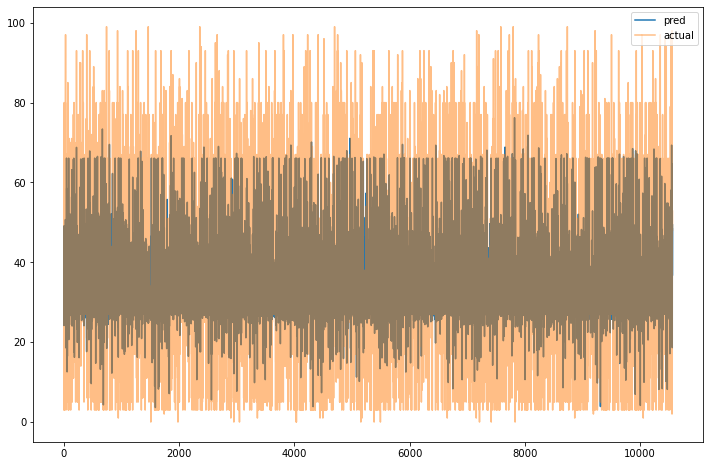

In [31]:
test_pred = model.predict(x_valid)
train_pred = model.predict(x_train)

plt.figure(figsize=(12,8))
plt.plot(test_pred, label='pred')
plt.plot(y_valid, label='actual', alpha=0.5)
plt.legend(loc='upper right')

In [32]:
print('< test >')
print('RMSE : ', rmse(y_valid, test_pred))

< test >
RMSE :  12.795065176628691


## 정답파일 생성

In [24]:
# submission.to_csv('baseline.csv',index = False)